<h1>Kvantedynamikk enheter</h1>

Schrödinger-ligningen for en elektron (i atomære enheter)

$$i \frac{\partial \Psi(x,t)}{\partial t} = -\frac{1}{2} \frac{\partial^2 \Psi(x,t)}{\partial x^2} - V(x) \, \Psi(x,t)$$

Her prøver vi å løse Schrödinger-ligningen for et enkelt modellsystem - en elektron i en dimensjon.

For å beskrive elektronens bevegelse må vi først spesifisere et potensial $V(x)$. I Python kan vi gjøre det i ved å (1) lage et interval med samplingspunkter på x-aksen:

X = np.linspace(-13,13,501)

Potensialet er en funksjon av X. For å beskrive en partikel innestengt mellom to "vegger" (potensialbarrierer) er det bra å vite om Heaviside-funksjonen heaviside($x$) som er 1 hvis $x > 0$ og 0 hvis $x < 0$.

Prøv å eksperimenter med koden under.

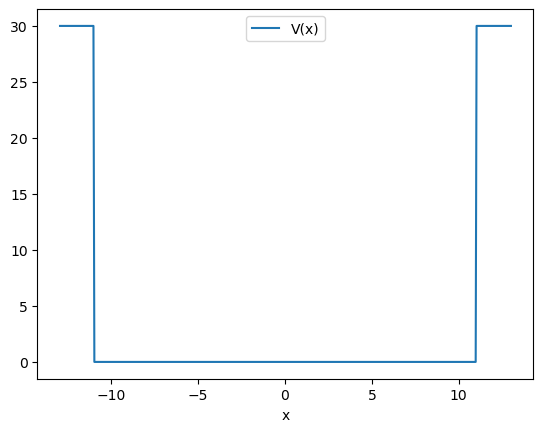

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-13,13,501)
X = X[1:]
V0 = 30
V = V0 * (np.heaviside(X - 11.0, 0.5) + np.heaviside(-11.0-X,0.5))

plt.plot(X, V, label='V(x)')
plt.xlabel('x')
plt.legend()
plt.show()

I koden under simuleres dynamikken for et elektron i en potensial (N.B. potensialet spesifieres på nytt). Hva skjer med bølgepakken over tid?

T_init =  (1.2478898780735412-0j)    T_pred =  1.25


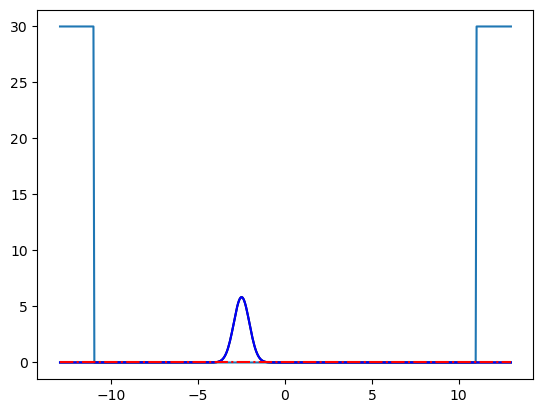

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def Laplacian(Psi,X):
    LapPsi = (np.roll(Psi,1) + np.roll(Psi,-1) - 2*Psi) / (X[1]-X[0])**2
    return LapPsi        

def Hamiltonian(Psi,X,V):
    return -0.5*Laplacian(Psi,X) + V * Psi

def Euler_step(Psi,X,V,dt):
    return -1j * Hamiltonian(Psi,X,V) * dt

def RungeKutta_step(Psi,X,V,dt):
    k1 = Euler_step(Psi,X,V,dt)
    k2 = Euler_step(Psi + 0.5*k1, X, V, dt)
    k3 = Euler_step(Psi + 0.5*k2, X, V, dt)
    k4 = Euler_step(Psi + k3, X, V, dt)
    return (k1 + 2*k2 + 2*k3 + k4) / 6.0

def animate_wavefunction(PsiAll,V,X,scale_factor=60):
    fig, ax = plt.subplots()
    ax.plot(X, V)
    line_abs, = ax.plot(X, scale_factor*np.abs(PsiAll[0]),'k-')
    line_re, = ax.plot(X, scale_factor*np.real(PsiAll[0]),'b-')
    line_im, = ax.plot(X, scale_factor*np.imag(PsiAll[0]),'r-.')

    def ex_ani(i):
        line_abs.set_ydata(scale_factor*np.abs(PsiAll[i]))
        line_re.set_ydata(scale_factor*np.real(PsiAll[i]))
        line_im.set_ydata(scale_factor*np.imag(PsiAll[i]))
        return line_abs, line_re, line_im

    anim = animation.FuncAnimation(fig, ex_ani, interval=100, blit=False, frames=range(len(PsiAll)))
    plt.show()    

def example_spread():
    X = np.linspace(-13,13,501)
    X = X[1:]
    V0 = 30
    V = V0 * (np.heaviside(X - 11.0, 0.5) + np.heaviside(-11.0-X,0.5))

    a = 2.5
    k = 0
    Psi_init = np.exp(-a*(X+2.5)**2) * np.exp(1j * k * X)
    Psi_init = Psi_init * np.sqrt(X[1]-X[0]) / np.linalg.norm(Psi_init)

    nfac = np.vdot(Psi_init, Psi_init)
    T_init = -0.5 * np.vdot(Psi_init,Laplacian(Psi_init,X)) / nfac
    T_pred = (k*k + a)/2
    print('T_init = ',T_init,'   T_pred = ',T_pred)

    dt = 1e-3 * 1/T_init

    Psi = np.copy(Psi_init)
    PsiAll = [np.copy(Psi)]
    for time_step in range(6000):
        Psi = Psi + RungeKutta_step(Psi,X,V,dt)
        Psi = Psi * np.sqrt(X[1]-X[0]) / np.linalg.norm(Psi)
        if time_step % 25 == 0:
            PsiAll.append(np.copy(Psi))        

    # animate
    animate_wavefunction(PsiAll,V,X, 100)


#############
example_spread()
